# MNIST Digit Classification with Tensorflow

In [16]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical

In [62]:
# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

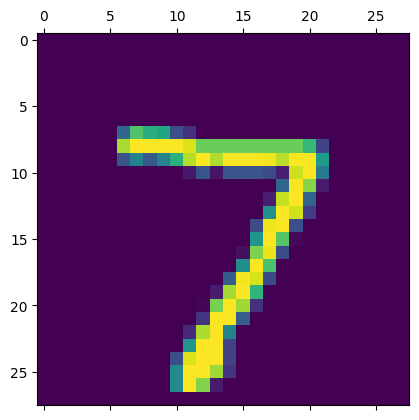

In [63]:
plt.matshow(x_test[0])

In [64]:
# Normalize pixel values to [0,1]
x_train = x_train.astype("float32") / 255.0
x_test = x_test.astype("float32") / 255.0

# Flatten 28x28 images → 784 vector
x_train = x_train.reshape(-1, 28*28)
x_test = x_test.reshape(-1, 28*28)

# One-hot encode labels (0–9)
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)


In [65]:
model = models.Sequential([
    layers.Dense(128, activation='relu', input_shape=(784,)),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')  # 10 classes
])


c:\Users\rohit\OneDrive\Desktop\Data mining\Day4\myenv\Lib\site-packages\keras\src\layers\core\dense.py:92: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [66]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)


In [67]:
model.fit(x_train, y_train, epochs=5, batch_size=64, validation_split=0.1)

Epoch 1/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 3ms/step - accuracy: 0.9165 - loss: 0.2890 - val_accuracy: 0.9667 - val_loss: 0.1165
Epoch 2/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9643 - loss: 0.1181 - val_accuracy: 0.9727 - val_loss: 0.0947
Epoch 3/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 5ms/step - accuracy: 0.9748 - loss: 0.0819 - val_accuracy: 0.9758 - val_loss: 0.0812
Epoch 4/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9810 - loss: 0.0617 - val_accuracy: 0.9788 - val_loss: 0.0757
Epoch 5/5
844/844 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9848 - loss: 0.0484 - val_accuracy: 0.9782 - val_loss: 0.0775


In [68]:
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test Accuracy: {test_acc*100:.2f}%")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9766 - loss: 0.0772
Test Accuracy: 97.66%


# Prediction

In [69]:
from tensorflow.keras.preprocessing import image
import numpy as np
from PIL import Image, ImageOps

In [ ]:
# Load your image
img_path = "digit.png"  # path to your image
img = Image.open(img_path).convert('L')  # convert to grayscale

In [71]:
# Resize to 28x28 pixels (MNIST size)
img = img.resize((28, 28))

In [72]:
# Convert to numpy array and normalize
img_array = np.array(img).astype('float32') / 255.0

In [73]:
# Flatten to match model input
img_array = img_array.reshape(1, 784)  # 1 sample, 784 features

In [74]:
# Predict
prediction = model.predict(img_array)
predicted_label = np.argmax(prediction)

print(f"Predicted Digit: {predicted_label}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
Predicted Digit: 7


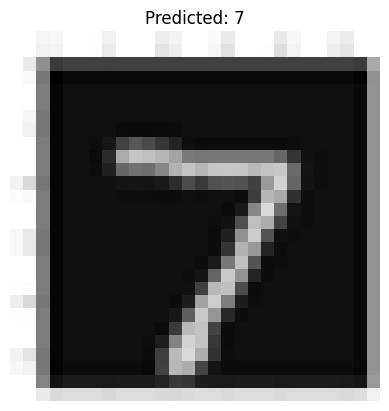

In [75]:
# Optional: Display the processed image
import matplotlib.pyplot as plt
plt.imshow(img_array.reshape(28, 28), cmap='gray')
plt.title(f"Predicted: {predicted_label}")
plt.axis('off')
plt.show()